# Ames Housing Prices - Step 1: Data Analysis
This notebook demonstrates how to setup a Cortex Dataset to make data analysis visual and straightforward in an interactive Python environment.

In [14]:
# Basic setup
%run ./config.ipynb

In [15]:
# Connect to Cortex 5 and create a Builder instance
cortex = Cortex.client()
builder = cortex.builder()

## Training Data Setup
Our first step is to load our training data from the target data source (in this case a local file).  The Cortex 5 SDK for Python makes extensive use of the excellent [Pandas](https://pandas.pydata.org/) library as well some other well know data analysis and visualization libraries.  In this first set of steps, we will create a Cortex Dataset using a Pandas DataFrame instantiated using the __read_csv__ function.  Cortex 5 will automatically build a rich Dataset object using the source data and prepare it for further usage.

In [16]:
train_df = pd.read_csv('../../data/kaggle/ames-housing/train.csv')

In [17]:
train_ds = builder.dataset('kaggle/ames-housing-train')\
    .title('Ames Housing Training Data')\
    .from_df(train_df).build()
    
print("%s (%s) v%d" % (train_ds.title, train_ds.name, train_ds.version))

Ames Housing Training Data (kaggle/ames-housing-train) v31


---
As you can see below, Cortex 5 auto-discovered all of the data parameters from the DataFrame and created the nesessary schema structure.

In [18]:
train_ds.parameters

[{'name': 'Id', 'type': 'integer', 'format': 'int64'},
 {'name': 'MSSubClass', 'type': 'integer', 'format': 'int64'},
 {'name': 'MSZoning', 'type': 'string'},
 {'name': 'LotFrontage', 'type': 'number', 'format': 'float'},
 {'name': 'LotArea', 'type': 'integer', 'format': 'int64'},
 {'name': 'Street', 'type': 'string'},
 {'name': 'Alley', 'type': 'string'},
 {'name': 'LotShape', 'type': 'string'},
 {'name': 'LandContour', 'type': 'string'},
 {'name': 'Utilities', 'type': 'string'},
 {'name': 'LotConfig', 'type': 'string'},
 {'name': 'LandSlope', 'type': 'string'},
 {'name': 'Neighborhood', 'type': 'string'},
 {'name': 'Condition1', 'type': 'string'},
 {'name': 'Condition2', 'type': 'string'},
 {'name': 'BldgType', 'type': 'string'},
 {'name': 'HouseStyle', 'type': 'string'},
 {'name': 'OverallQual', 'type': 'integer', 'format': 'int64'},
 {'name': 'OverallCond', 'type': 'integer', 'format': 'int64'},
 {'name': 'YearBuilt', 'type': 'integer', 'format': 'int64'},
 {'name': 'YearRemodAdd',

In [6]:
train_ds.data_dictionary(train_df)

,Attribute,Type,% Nulls,Count,Unique,Observations,Knowledge
0,1stFlrSF,int64,0.000,1460,753,max=4692 | min=334 | mean=1162.63,
1,2ndFlrSF,int64,0.000,1460,417,max=2065 | min=0 | mean=346.99,
2,3SsnPorch,int64,0.000,1460,20,max=508 | min=0 | mean=3.41,
3,Alley,object,0.940,91,2,Sample: Grvl | Pave,
4,BedroomAbvGr,int64,0.000,1460,8,max=8 | min=0 | mean=2.87,
5,BldgType,object,0.000,1460,5,Sample: 1Fam | TwnhsE | Duplex,
6,BsmtCond,object,0.030,1423,4,Sample: Fa | Gd | TA,
7,BsmtExposure,object,0.030,1422,4,Sample: Av | Gd | No,
8,BsmtFinSF1,int64,0.000,1460,637,max=5644 | min=0 | mean=443.64,
9,BsmtFinSF2,int64,0.000,1460,144,max=1474 | min=0 | mean=46.55,


In [19]:
viz = train_ds.visuals(train_df, figsize=(24,9))

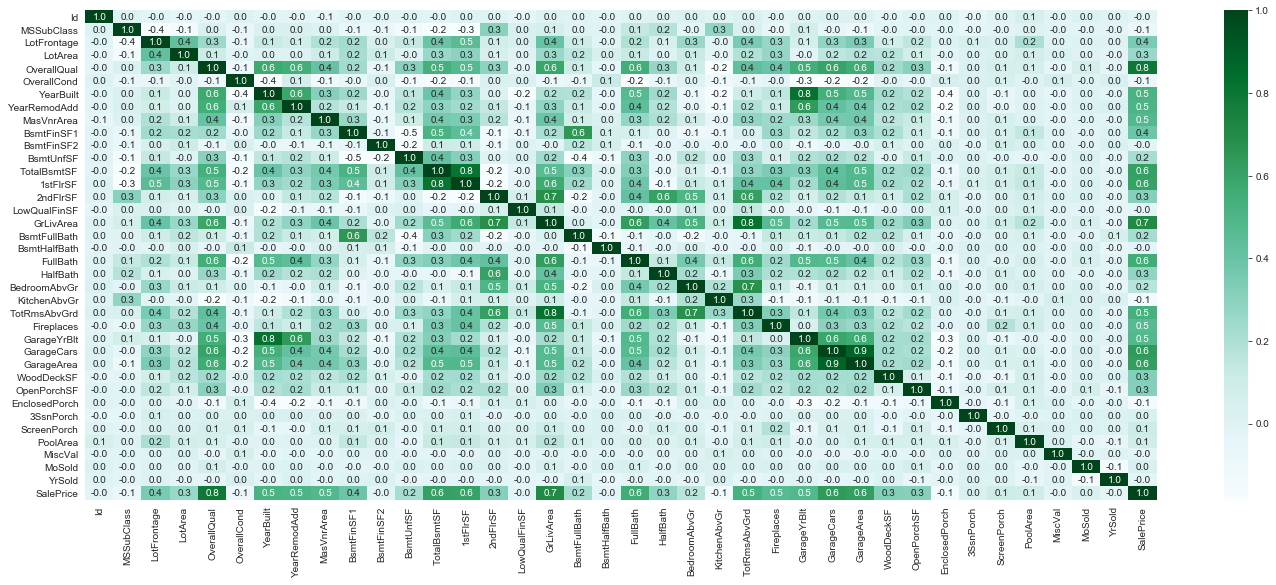

<Figure size 1728x648 with 0 Axes>

In [20]:
viz.show_corr_heatmap()

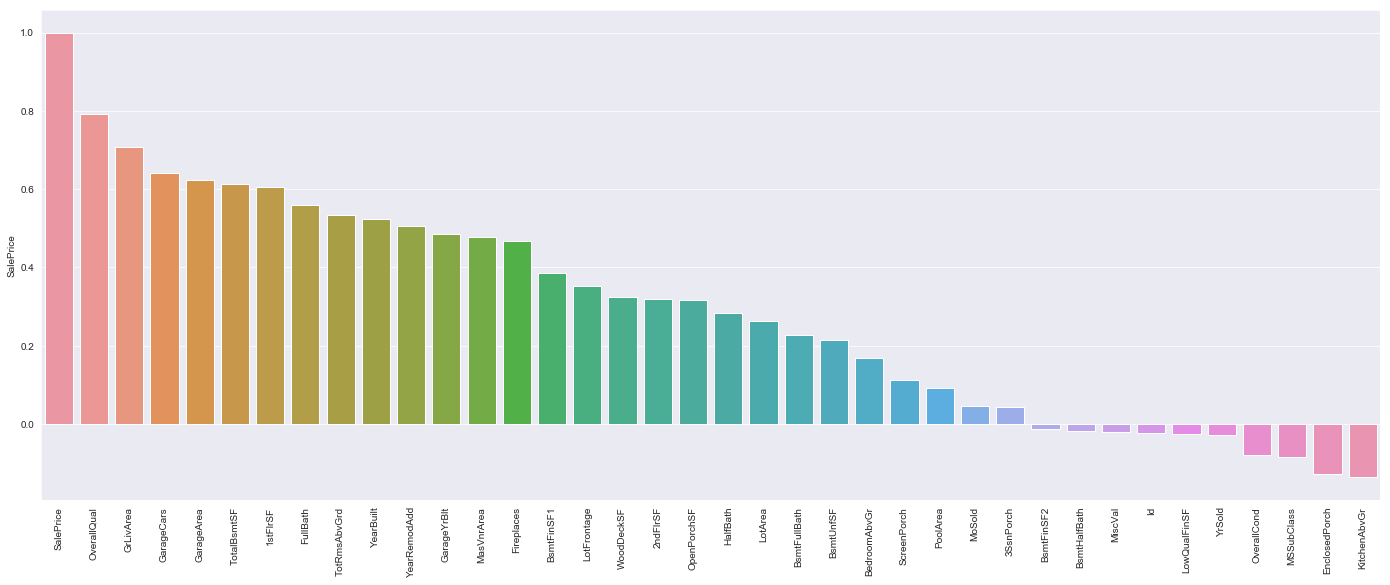

<Figure size 1728x648 with 0 Axes>

In [21]:
viz.show_corr('SalePrice')

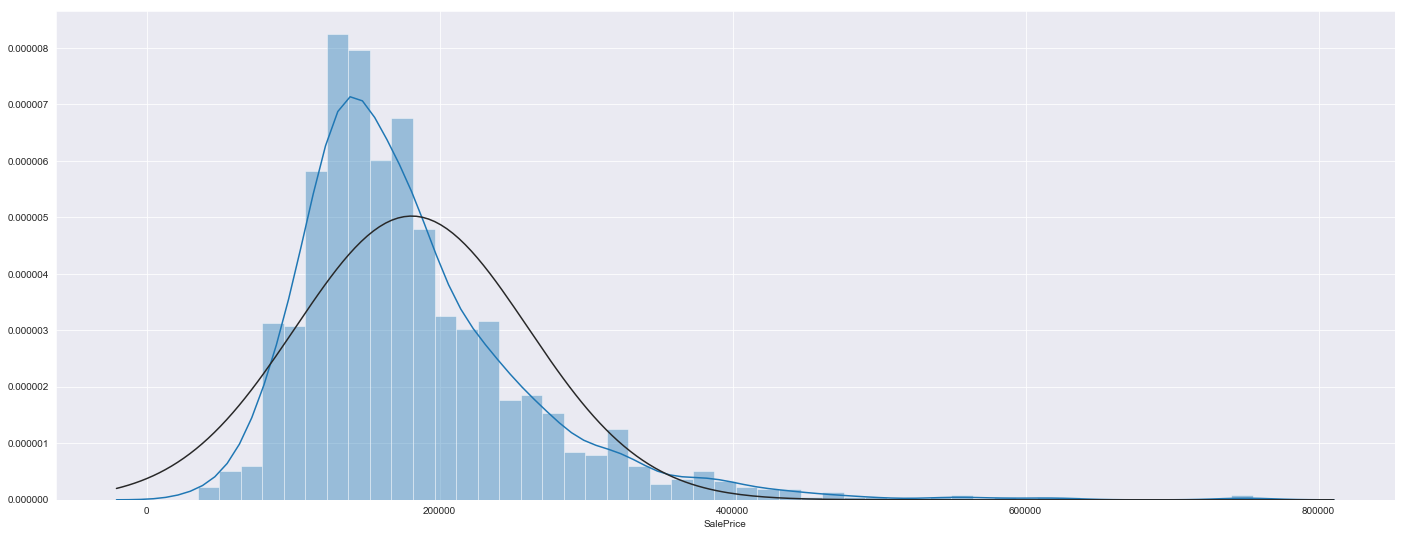

<Figure size 1728x648 with 0 Axes>

In [22]:
viz.show_dist('SalePrice')

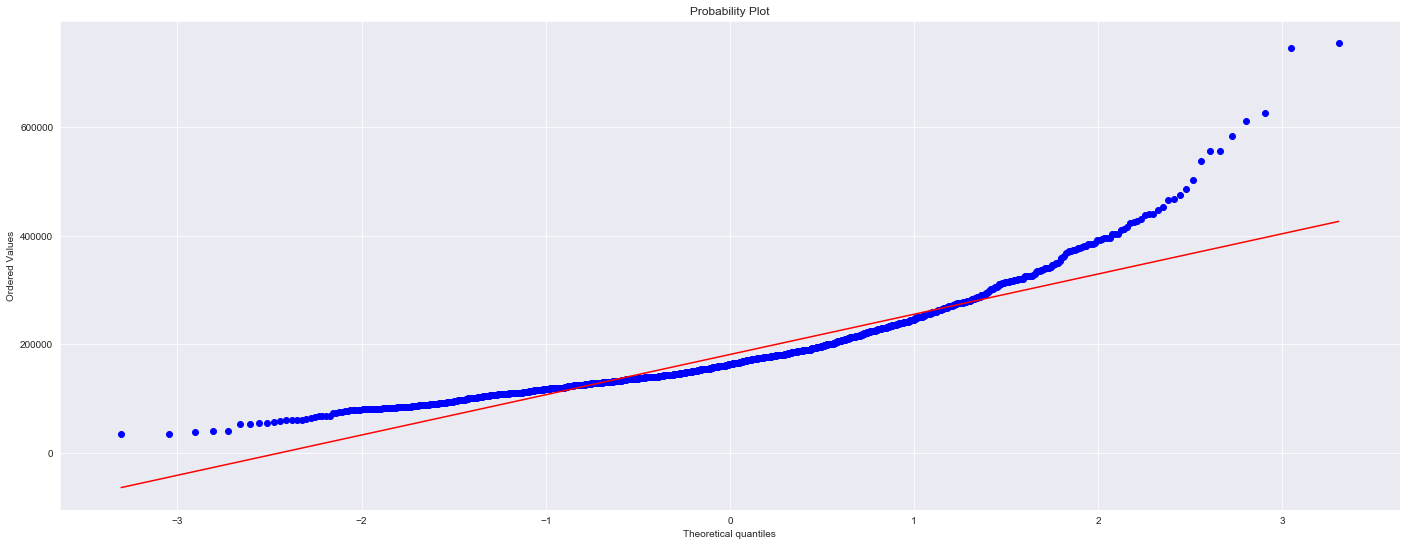

<Figure size 1728x648 with 0 Axes>

In [23]:
viz.show_probplot('SalePrice')

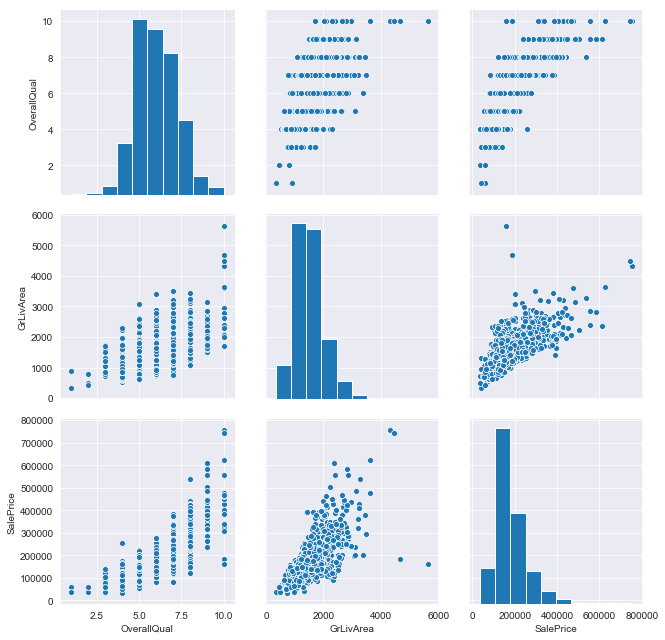

<Figure size 1728x648 with 0 Axes>

In [24]:
viz.show_corr_pairs('SalePrice', threshold=0.7)

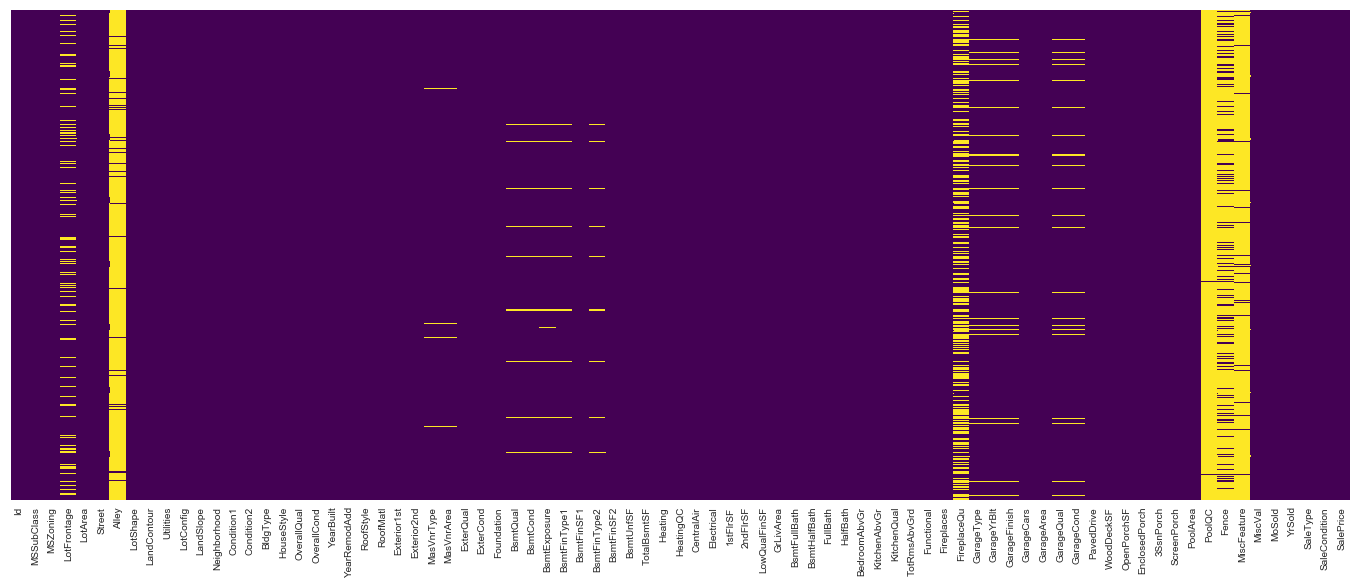

<Figure size 1728x648 with 0 Axes>

In [25]:
viz.show_missing()